Load up a module that makes code look pretty

In [1]:
%load_ext jupyter_black

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
np.random.seed(42)

In [4]:
from platform import system

source = ("data\\" if system() == "Windows" else "data/") + "diamonds.csv"

N = 2000

df = pd.read_csv(source).sample(n=N, random_state=42)

print(df.shape)
df.head(8)

(2000, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
33553,0.61,Good,G,I1,61.2,57.2,931,5.44,5.49,3.34
9427,0.91,Good,G,VS1,64.1,60.0,4744,6.11,6.06,3.90
199,0.77,Ideal,H,SI1,62.2,56.0,2781,5.83,5.88,3.64
12447,1.13,Very Good,I,VS2,60.7,58.0,5531,6.72,6.75,4.09
39489,0.32,Good,H,VS2,63.1,55.0,505,4.33,4.36,2.74
42724,0.56,Premium,I,VVS1,60.6,59.0,1743,5.33,5.29,3.22
10822,0.34,Ideal,G,VS2,61.7,56.0,596,4.48,4.53,2.78
49498,0.76,Ideal,H,VS2,62.7,57.0,2668,5.82,5.86,3.66


In [5]:
df["cut_ord"] = df["cut"].map(
    {"Fair": 0.0, "Good": 1.0, "Very Good": 2.0, "Premium": 3.0, "Ideal": 4.0}
)
df["clarity_ord"] = df["clarity"].map(
    {
        "I1": 0.0,
        "SI2": 1.0,
        "SI1": 2.0,
        "VS2": 3.0,
        "VS1": 4.0,
        "VVS2": 5.0,
        "VVS1": 6.0,
        "IF": 7.0,
    }
)

df["color_ord"] = df["color"].map(
    {
        "J": 0.0,
        "I": 1.0,
        "H": 2.0,
        "G": 3.0,
        "F": 4.0,
        "E": 5.0,
        "D": 6.0,
    }
)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_ord,clarity_ord,color_ord
33553,0.61,Good,G,I1,61.2,57.2,931,5.44,5.49,3.34,1.0,0.0,3.0
9427,0.91,Good,G,VS1,64.1,60.0,4744,6.11,6.06,3.90,1.0,4.0,3.0
199,0.77,Ideal,H,SI1,62.2,56.0,2781,5.83,5.88,3.64,4.0,2.0,2.0
12447,1.13,Very Good,I,VS2,60.7,58.0,5531,6.72,6.75,4.09,2.0,3.0,1.0
39489,0.32,Good,H,VS2,63.1,55.0,505,4.33,4.36,2.74,1.0,3.0,2.0


In [6]:
df = df.drop(["cut", "clarity", "color"], axis=1)
# df = pd.get_dummies(df, columns=["color"])

# Assignment 1. Correlation coefficient

With the data preprocessed, we have 1 categorical feature and 9 numerical features. In this task a linear regression should be made with a pair of features and several metrics calculated on its prediction results.

In [7]:
df.head()

,carat,depth,table,price,x,y,z,cut_ord,clarity_ord,color_ord
33553,0.61,61.2,57.2,931,5.44,5.49,3.34,1.0,0.0,3.0
9427,0.91,64.1,60.0,4744,6.11,6.06,3.90,1.0,4.0,3.0
199,0.77,62.2,56.0,2781,5.83,5.88,3.64,4.0,2.0,2.0
12447,1.13,60.7,58.0,5531,6.72,6.75,4.09,2.0,3.0,1.0
39489,0.32,63.1,55.0,505,4.33,4.36,2.74,1.0,3.0,2.0


In [8]:
df.corr()

,carat,depth,table,price,x,y,z,cut_ord,clarity_ord,color_ord
carat,1.000000,0.006289,0.188210,0.923949,0.978097,0.977980,0.711455,-0.117483,-0.351230,-0.245241
depth,0.006289,1.000000,-0.276641,-0.038140,-0.045476,-0.047344,0.053170,-0.237389,-0.054649,-0.100938
table,0.188210,-0.276641,1.000000,0.141577,0.194390,0.187546,0.097422,-0.424383,-0.161834,0.009918
price,0.923949,-0.038140,0.141577,1.000000,0.889720,0.892285,0.644583,-0.042943,-0.148031,-0.122579
x,0.978097,-0.045476,0.194390,0.889720,1.000000,0.998804,0.723436,-0.104170,-0.373082,-0.222799
y,0.977980,-0.047344,0.187546,0.892285,0.998804,1.000000,0.723757,-0.105971,-0.368698,-0.221674
z,0.711455,0.053170,0.097422,0.644583,0.723436,0.723757,1.000000,-0.110007,-0.268589,-0.157601
cut_ord,-0.117483,-0.237389,-0.424383,-0.042943,-0.104170,-0.105971,-0.110007,1.000000,0.193517,0.023906
clarity_ord,-0.351230,-0.054649,-0.161834,-0.148031,-0.373082,-0.368698,-0.268589,0.193517,1.000000,-0.038316
color_ord,-0.245241,-0.100938,0.009918,-0.122579,-0.222799,-0.221674,-0.157601,0.023906,-0.038316,1.000000


Let's see the pairvise scatterplots of all the features in our data.

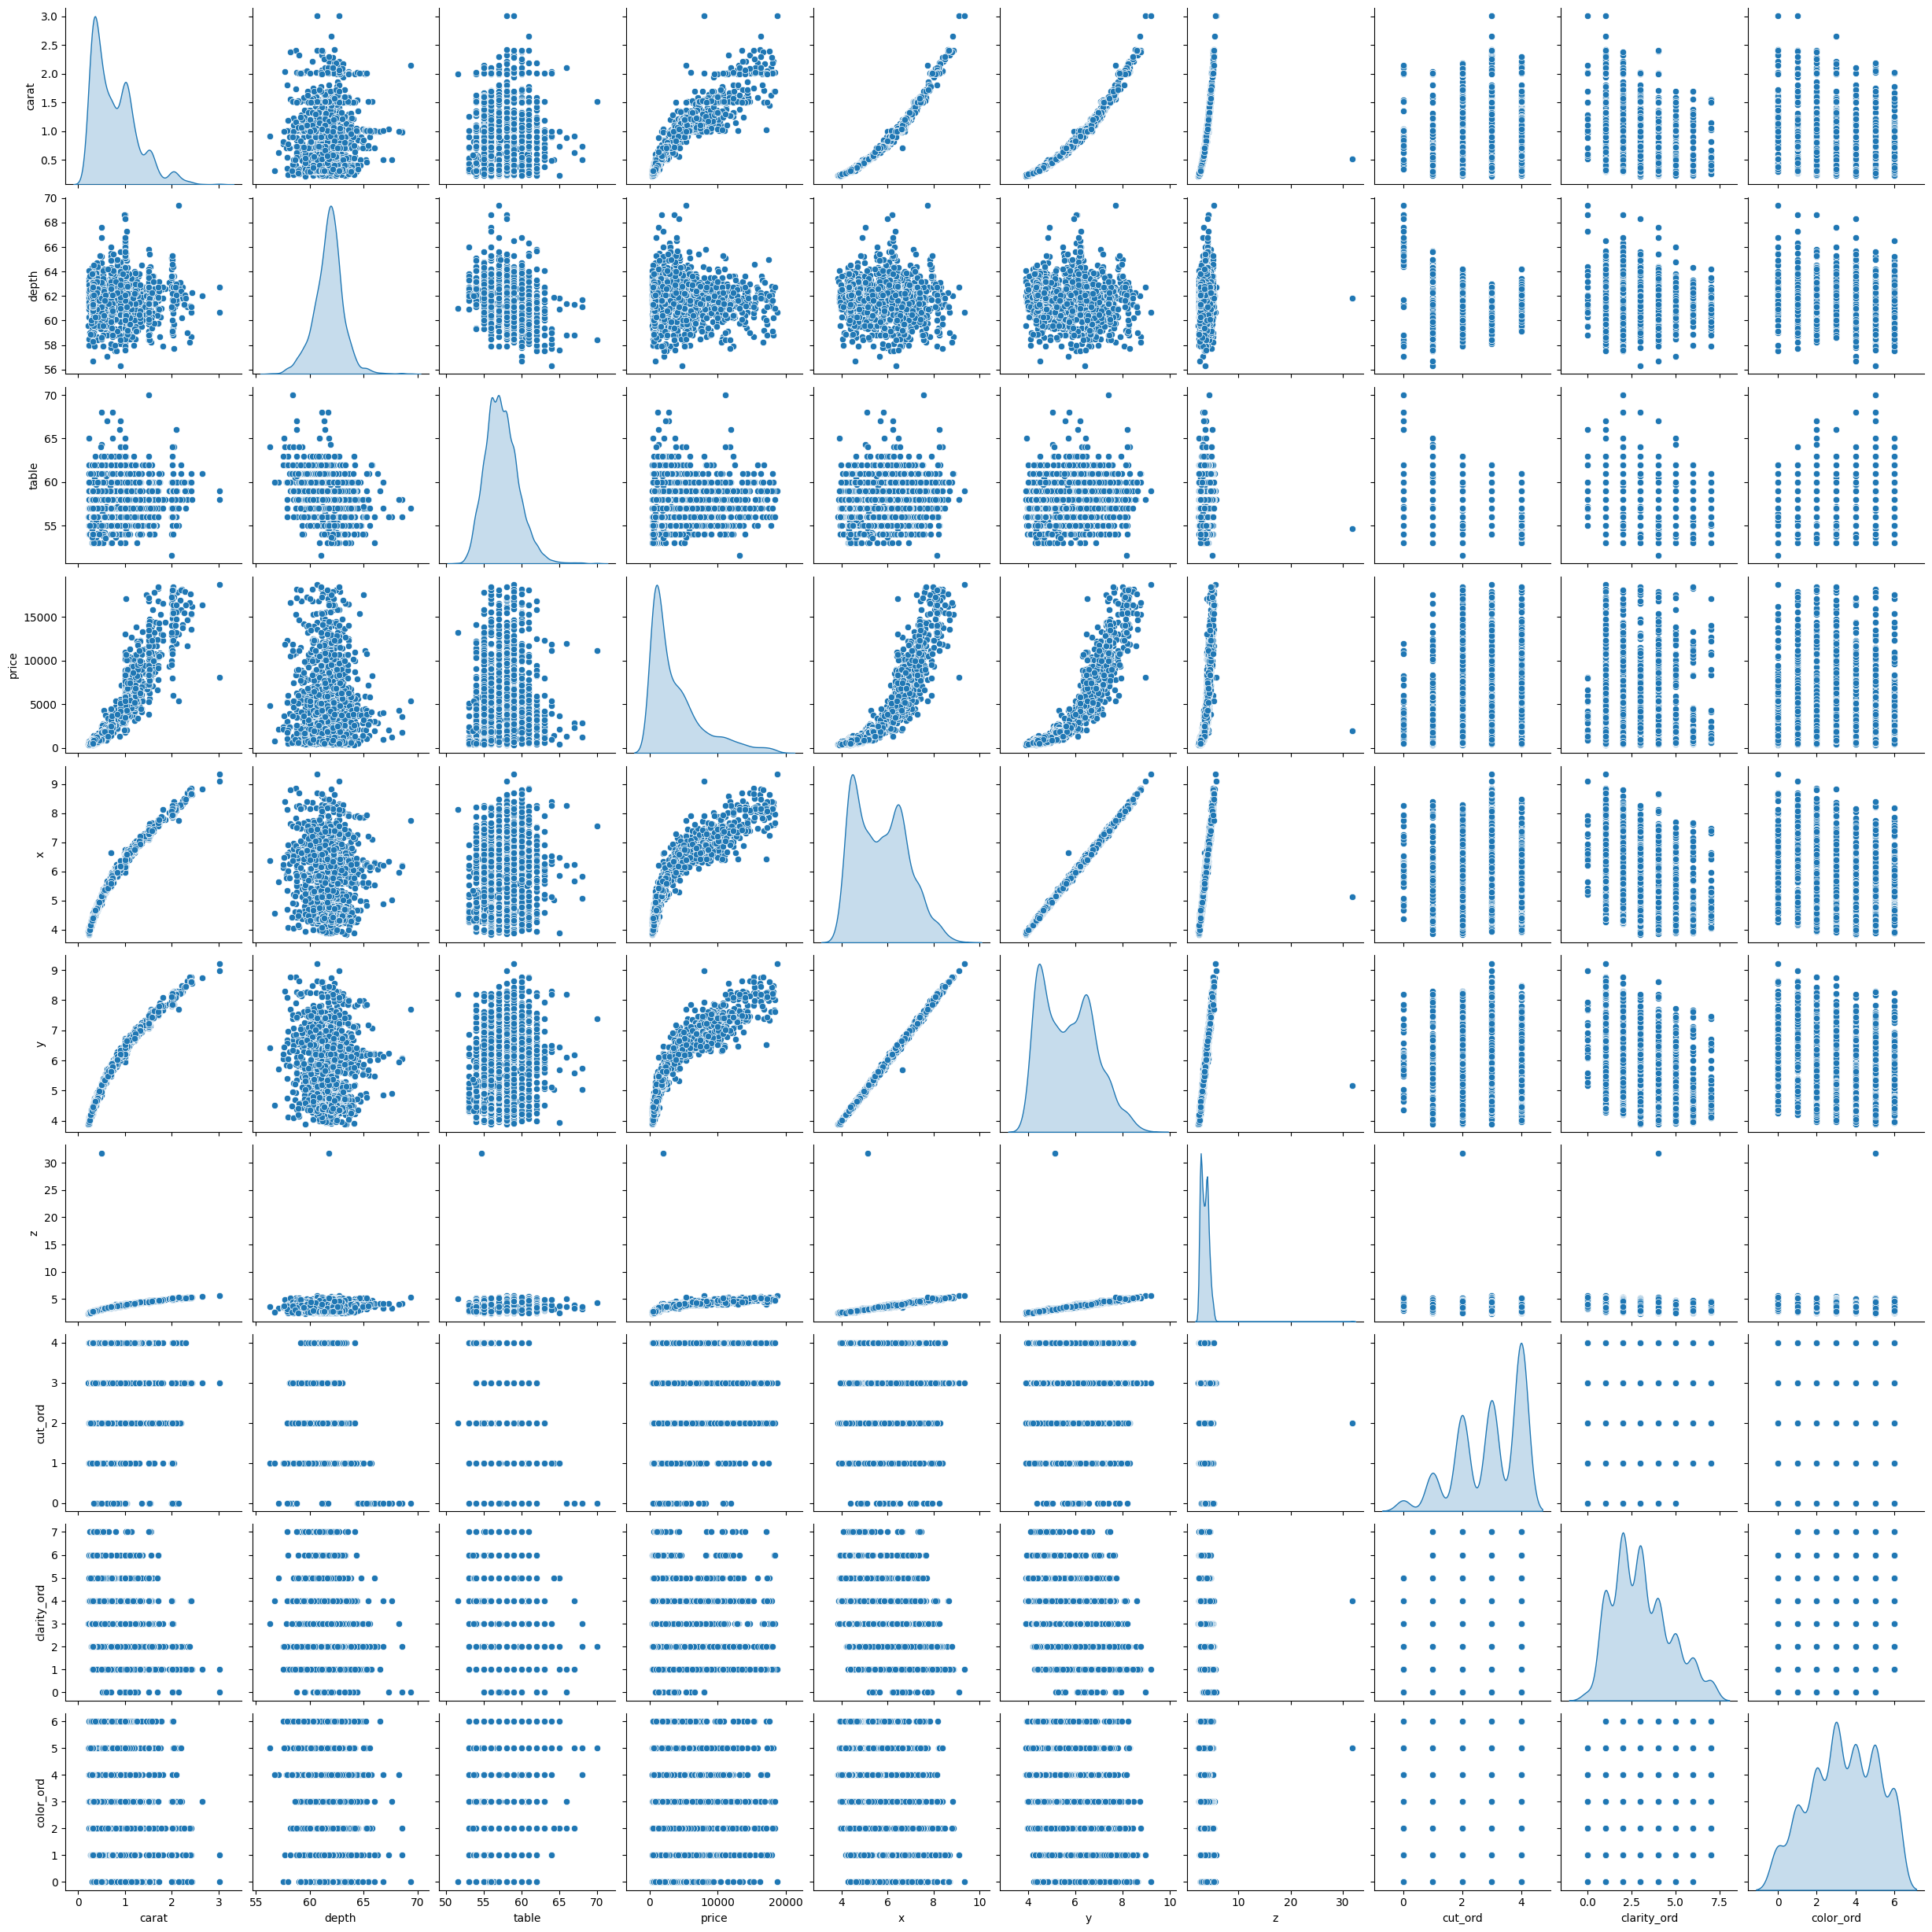

In [9]:
pplot = sns.pairplot(df, diag_kind="kde")
pplot.savefig("media/pairplot.png")
plt.show()

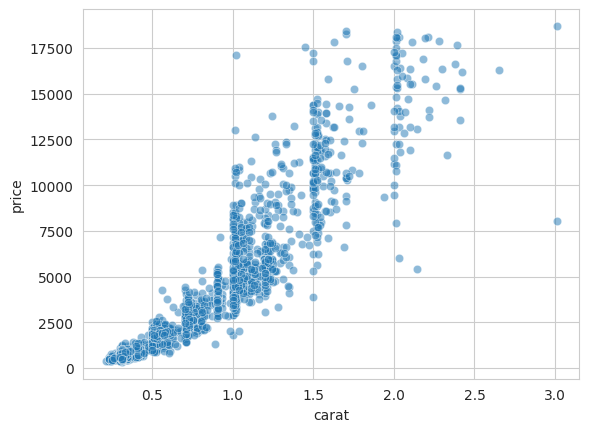

In [10]:
with sns.axes_style("whitegrid"):
    sns.scatterplot(df, x="carat", y="price", alpha=0.5)
plt.show()

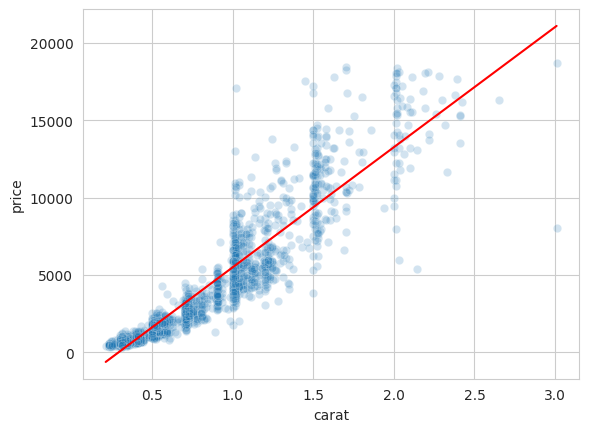

In [11]:
from sklearn.linear_model import LinearRegression


x = df["carat"].to_numpy().reshape(-1, 1)
y = df["price"].to_numpy().reshape(-1, 1)

reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x).reshape(-1, 1)

with sns.axes_style("whitegrid"):
    sns.scatterplot(df, x="carat", y="price", alpha=0.2)
    sns.lineplot(df, x="carat", y=y_pred.flatten(), color="r")
plt.show()

In [12]:
corr = df.corr()["carat"]["price"]
corr

np.float64(0.9239493885870907)

In [13]:
ss_res = ((y - y_pred) ** 2).sum()
ss_tot = ((y - np.mean(y)) ** 2).sum()

determinacy = 1.0 - ss_res / ss_tot
determinacy

np.float64(0.8536824726704555)

Let's check whether the calculated coefficient of determination is correct. Since we are using least-squares linear regression, it should be equal to the correlation coefficient squared.

In [14]:
np.abs(determinacy - corr**2) < 1e-9

np.True_

Linear regression coefficients

In [15]:
a = corr * np.std(y) / np.std(x)
b = np.mean(y) - a * np.mean(x)

Let's check the relative deviations of predicted values from true values and vise-versa for a set of 4 randomly selected instances.

In [16]:
idx = np.random.randint(0, y.shape[0] - 1, size=4)

x_cut = x[idx]
y_cut = y[idx]

dy_cut = y_cut - (a * x_cut + b)

dev_from_true = 100 * dy_cut / y_cut
dev_from_pred = 100 * dy_cut / (a * x_cut + b)

In [17]:
x_cut

array([[0.3 ],
       [0.31],
       [0.4 ],
       [2.01]])

In [18]:
y_cut

array([[  863],
       [  788],
       [  662],
       [17078]])

In [19]:
dev_from_true

array([[ 89.92447975],
       [ 79.12761054],
       [-30.23846398],
       [ 21.86830081]])

In [20]:
dev_from_pred

array([[892.50458026],
       [379.10183059],
       [-23.21776766],
       [ 27.98902498]])

Now, let's do the same for each instance in the dataset

In [21]:
dy = y - (a * x + b)

tot_dev_from_true = np.abs(100 * dy / y).mean()
tot_dev_from_pred = np.abs(100 * dy / (a * x + b)).mean()

print(
    f"MAPE(relative to true values): {tot_dev_from_true:0.4f}%\nMAPE(relative to predicted values): {tot_dev_from_pred:0.4f}%"
)

MAPE(relative to true values): 39.2063%
MAPE(relative to predicted values): 121.4897%


Now let's try polynomial regression.

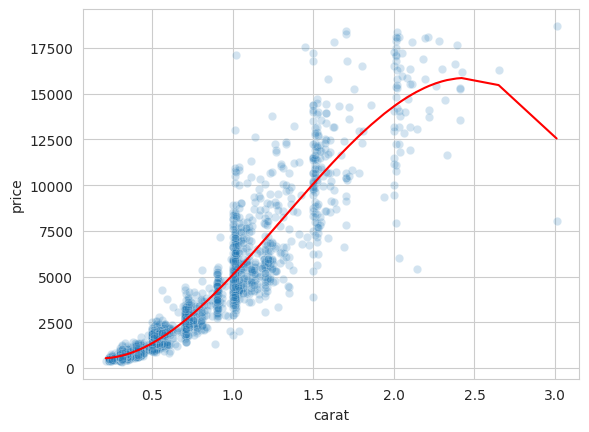

In [22]:
x_stacked = np.hstack([np.ones_like(x), x, x**2, x**3])

reg = LinearRegression().fit(x_stacked, y)

with sns.axes_style("whitegrid"):
    sns.scatterplot(df, x="carat", y="price", alpha=0.2)
    sns.lineplot(df, x="carat", y=reg.predict(x_stacked).flatten(), color="r")
plt.show()

In [23]:
y_stacked = reg.predict(x_stacked).reshape(-1, 1)
dy_stacked = y - y_stacked


tot_dev_from_true_stacked = np.abs(100 * dy / y).mean()
tot_dev_from_pred_stacked = np.abs(100 * dy / y_stacked).mean()

print(
    f"MAPE(relative to true values): {tot_dev_from_true_stacked:0.4f}%\nMAPE(relative to predicted values): {tot_dev_from_pred_stacked:0.4f}%"
)

MAPE(relative to true values): 39.2063%
MAPE(relative to predicted values): 37.0984%


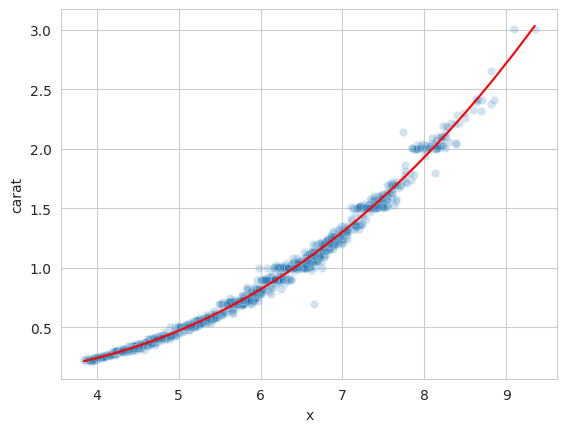

In [24]:
x = df["x"].to_numpy().reshape(-1, 1)
y = df["carat"].to_numpy().reshape(-1, 1)

x_stacked = np.hstack([np.ones_like(x), x, x**2, x**3])

reg = LinearRegression().fit(x_stacked, y)

with sns.axes_style("whitegrid"):
    sns.scatterplot(df, x="x", y="carat", alpha=0.2)
    sns.lineplot(df, x="x", y=reg.predict(x_stacked).flatten(), color="r")
plt.show()

# Assignment 3. K-means clustering

For the K-means clustering we will use the following features:  `depth`, `table`, `carat` and `price`. First, we standardize our features:

In [25]:
from sklearn.preprocessing import StandardScaler

frame = df[["depth", "table", "carat", "price"]]

frame_std = pd.DataFrame(
    StandardScaler().fit(frame).transform(frame),
    columns=["depth", "table", "carat", "price"],
)
frame.head()

,depth,table,carat,price
33553,61.2,57.2,0.61,931
9427,64.1,60.0,0.91,4744
199,62.2,56.0,0.77,2781
12447,60.7,58.0,1.13,5531
39489,63.1,55.0,0.32,505


In [26]:
frame_std.head()

,depth,table,carat,price
0,-0.397644,-0.086720,-0.378742,-0.748763
1,1.734497,1.213151,0.265122,0.226584
2,0.337577,-0.643807,-0.035348,-0.275542
3,-0.765255,0.284672,0.737288,0.427894
4,0.999276,-1.108047,-1.001144,-0.857731


In [27]:
from sklearn.cluster import KMeans

state = np.random.RandomState(seed=42)

grand_mean = frame.to_numpy().mean(axis=0)
print(f"Grand mean: {grand_mean}")

for n in [4, 7]:
    intertiae = []
    kmeans = []
    for i in range(12):
        kmeans += [KMeans(n_clusters=n, random_state=state, n_init=1).fit(frame_std)]
        intertiae += [kmeans[i].inertia_]

    best_idx = np.argmin(np.array(intertiae[1:]))
    clusters = kmeans[best_idx + 1]

    print(
        f"\n\nn_clusters: {n}\nall intertia values:\n\n{intertiae}\n\nbest k-means inertia(run #{best_idx+1}): {clusters.inertia_:0.4f}\n"
    )

    table_vals = pd.DataFrame(
        [[1, 2, 3, 4]], columns=["depth", "table", "carat", "price"]
    )

    for j in range(clusters.n_clusters):
        cluster = frame[clusters.labels_ == j]
        cluster_center = cluster.to_numpy().mean(axis=0)
        new_row = pd.DataFrame(
            [
                cluster_center,
                cluster_center - grand_mean,
                (cluster_center - grand_mean) / grand_mean,
            ],
            columns=["depth", "table", "carat", "price"],
            index=[j * 3 + k for k in range(3)],
        )
        table_vals = pd.concat([table_vals, new_row])
        print(
            f"cluster #{j+1}.\n# of elements: {cluster.shape[0]}\ncenter: {cluster_center}\ngrand mean deviation:{cluster_center - grand_mean}\nrelative grand mean deviation: {(cluster_center - grand_mean)/grand_mean}\n"
        )
    table_vals.to_csv(f"{n}_clusters.csv")

Grand mean: [6.174085e+01 5.738680e+01 7.864700e-01 3.858198e+03]


n_clusters: 4
all intertia values:

[3401.85081933973, 3398.717106881018, 3400.694326628974, 3400.6959218123034, 3401.7438833659453, 3401.624670844329, 3401.106345895305, 3398.756802859994, 3401.6715970859273, 3785.1833518684625, 3400.9722266617982, 3398.761606677668]

best k-means inertia(run #1): 3398.7171

cluster #1.
# of elements: 234
center: [6.14547009e+01 5.80837607e+01 1.68649573e+00 1.24635812e+04]
grand mean deviation:[-2.86149145e-01  6.96960684e-01  9.00025726e-01  8.60538320e+03]
relative grand mean deviation: [-0.00463468  0.01214497  1.1443866   2.23041513]

cluster #2.
# of elements: 854
center: [6.20033958e+01 5.61681499e+01 4.43770492e-01 1.27646604e+03]
grand mean deviation:[ 2.62545785e-01 -1.21865012e+00 -3.42699508e-01 -2.58173196e+03]
relative grand mean deviation: [ 0.00425238 -0.02123572 -0.4357439  -0.66915486]

cluster #3.
# of elements: 512
center: [6.25968750e+01 5.73386719e+01 1.04564453e